# **Diabetes Prdiction using Logistic Regression**

**Files Upload**

In [ ]:
from google.colab import files
upload= files.upload()

Saving diabetes.csv to diabetes.csv


**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd


**Load Dataset**

In [ ]:
data = pd.read_csv('diabetes.csv') #pima indians diabetes dataset

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,1,89,66,23,94,28.1,0.167,21,0
2,5,116,74,0,0,25.6,0.201,30,0
3,10,115,0,0,0,35.3,0.134,29,0
4,4,110,92,0,0,37.6,0.191,30,0


**Selecting Features**

In [ ]:
X = data.iloc[:,0:8].copy() #Features - Independent Variables
y = data.iloc[:,8].copy() #Target Variable

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,85,66,29,0,26.6,0.351,31
1,1,89,66,23,94,28.1,0.167,21
2,5,116,74,0,0,25.6,0.201,30
3,10,115,0,0,0,35.3,0.134,29
4,4,110,92,0,0,37.6,0.191,30
...,...,...,...,...,...,...,...,...
763,1,128,88,39,110,36.5,1.057,37
764,0,123,72,0,0,36.3,0.258,52
765,6,190,92,0,0,35.5,0.278,66
766,9,170,74,31,0,44.0,0.403,43


In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
763    1
764    1
765    1
766    1
767    1
Name: Outcome, Length: 768, dtype: int64


**Scaling**

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_after_min_max_scaler = min_max_scaler.fit_transform(X)

print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)


After min max Scaling : 
 [[0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.05882353 0.44723618 0.54098361 ... 0.41877794 0.03800171 0.        ]
 [0.29411765 0.58291457 0.60655738 ... 0.38152012 0.05251921 0.15      ]
 ...
 [0.35294118 0.95477387 0.75409836 ... 0.5290611  0.0853971  0.75      ]
 [0.52941176 0.85427136 0.60655738 ... 0.6557377  0.13877028 0.36666667]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]]


**Spliting Dataset into Training and Test Set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_after_min_max_scaler, y, test_size = 0.2)

In [ ]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

# **Logistics Regression**

**Model Development**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

**Actual Class vs Predicted Class**

In [ ]:
print(y), print(y_pred)

0      0
1      0
2      0
3      0
4      0
      ..
763    1
764    1
765    1
766    1
767    1
Name: Outcome, Length: 768, dtype: int64
[0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0
 0 1 1 1 0 1]


(None, None)

**Model Evaluation using Confusion Matrix**

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[81 12]
 [35 26]]


**Visualizing Confusion Matrix using Heatmap**

Text(0.5, 257.44, 'Predicted Label')

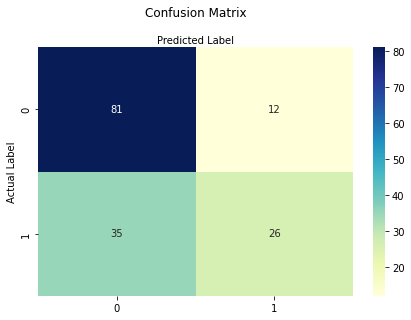

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Creating Heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion Matrix', y =1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

**Evaluation Metrics**

In [ ]:
from sklearn.metrics import classification_report
target = ['Without_Diabetes', 'With_Diabetes']
print(classification_report(y_test, y_pred, target_names=target))

                  precision    recall  f1-score   support

Without_Diabetes       0.81      0.87      0.84       100
   With_Diabetes       0.72      0.61      0.66        54

        accuracy                           0.78       154
       macro avg       0.76      0.74      0.75       154
    weighted avg       0.77      0.78      0.77       154



# **Naive Bayes Classifier**

**Model Development**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
y_pred = model.predict(X_test)

**Actual Class vs Predicted Class**

In [ ]:
print(y), print(y_pred)

0      0
1      0
2      0
3      0
4      0
      ..
763    1
764    1
765    1
766    1
767    1
Name: Outcome, Length: 768, dtype: int64
[0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1
 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0
 0 1 1 1 0 1]


(None, None)

**Model Evaluation using Confusion Matrix**

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[79 21]
 [19 35]]


**Visualizing Confusion Matrix using Heatmap**

Text(0.5, 257.44, 'Predicted Label')

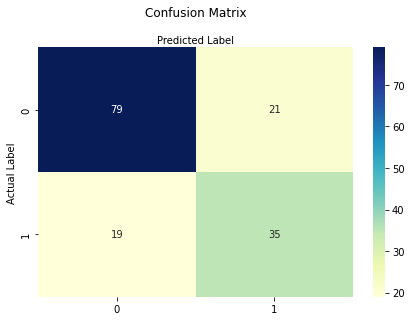

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Creating Heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion Matrix', y =1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

**Evaluation Metrics**

In [ ]:
from sklearn.metrics import classification_report
target = ['Without_Diabetes', 'With_Diabetes']
print(classification_report(y_test, y_pred, target_names=target))

                  precision    recall  f1-score   support

Without_Diabetes       0.81      0.79      0.80       100
   With_Diabetes       0.62      0.65      0.64        54

        accuracy                           0.74       154
       macro avg       0.72      0.72      0.72       154
    weighted avg       0.74      0.74      0.74       154

